Task:
As a data analyst, your task is to prepare and analyse the data set using appropriate data preparation and statistical techniques and ultimately apply the machine learning models for the specified tasks. Your analysis should aim to identify any relationships or trends in the data that can be used to improve employee satisfaction, productivity and issues. Recognise suitable independent variables and target variable from the dataset to justify your classification/ prediction tasks. You can perform clustering on the dataset based on your analysis if applicable. You can generate synthetic data or use any additional data to support your machine learning models if required.


Data Preparation
● Characterisation of the data set: size; number of attributes; has/does not have missing values, number of observations etc.[0-10]
● Application of Data preparation/evaluation methods (Cleaning, renaming, etc) and EDA (Exploratory Data Analysis) visualizations (plural), including a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it.[0-20]
● Apply encoding, scaling and feature engineering as and if required, detailing how and why you used these techniques and the rationale for your decisions.[0-30]
● Explore the possibility of using dimensional reduction on the dataset. Employ both LDA (Linear Discriminant Analysis) and PCA (Principal Component Analysis) and compare the separation of
classes through visualization. Explain the difference between both techniques in your own words and discuss in detail how your results may affect your analysis of classifying or clustering the normal as compared to anomalous biddings.[0-40]


Machine Learning
● Provide a conceptual understanding and logical justification based on the reasoning for the specific choice of machine learning approaches (supervised/ Unsupervised) for the provided data set. (0-20 marks)
● Machine Learning models can be used for Prediction, Classification, and Clustering. You can choose suitable features for the machine learning models based on feature selection methods, such as random forest or any other method. The selection of hyperparameters for the ML models should be performed by using hyperparameter tuning, such as GridSearchCV. Obtain best accuracy using optimal values of the hyperparameters.. (0-30 marks)
● You should train and test the Machine learning models in the case of supervised learning for different splits (at least 2 different splits) and use appropriate metrics for unsupervised learning. Use K-fold cross-validation to provide authenticity of the modelling outcomes. (0-30 marks)
● Exhibit a comparison of ML modelling outcomes using a Table or graph visualisation. Identify the possible similarities and contrast of the Machine Learning modelling outcomes based on chosen metric and discuss their statistical understanding. (0-20 marks)


Report
A report is required to provide the details of work performed in all tasks. The report should be based on Introduction, rationale of data preparation techniques, machines learning models and conclusions. Illustrations should be used to highlight the details of any section.
This should also include evidence to support your data wrangling and analysis through the use of references and citations.
Conclusions, Findings of data set and references/citations in (HARVARD style). This should be completed in the Jupyter Notebook Markdown.

# Libraries 

In [1]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

License
This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

DOI
10.24432/C5BS66

Creators
NA NA
National Center for Health Statistics (NCHS) at the Centers for Disease Control and Prevention (CDC)

https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset

# Same text as ca1

# EDA

Exploratory Data Analysis. 

After importing the necessary libraries the next step is to do the Exploratory Data Analysis in our raw data to check its characteristics, such as: the size, shape, which kind of features and observations they are, if there are any missing or duplicated values and what kind of distribution it is. EDA was originally developed in 1970 by the American mathematician John Tukey (IBM, 2023). 

This is a crucial task because it is the one that helps us to understand what we are dealing with and which approach we are going to use next to obtain a good accuracy for the Machine Learning Model applied and get effective results. 



In [2]:
age = pd.read_csv("NHANES_age_prediction.csv")

In [3]:
age.tail(2)

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
2276,83718.0,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99
2277,83727.0,Adult,26.0,1.0,2.0,24.5,108.0,2.0,108.0,3.76


In [4]:
age.shape

(2278, 10)

In [5]:
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


In [6]:
age.duplicated().sum()

0

In [7]:
age.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [8]:
age.drop(columns = "SEQN", inplace = True)

In [9]:
age["age_group"].unique()

array(['Adult', 'Senior'], dtype=object)

In [10]:
age["age_group"].value_counts()

age_group
Adult     1914
Senior     364
Name: count, dtype: int64

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age_group', ylabel='Count'>

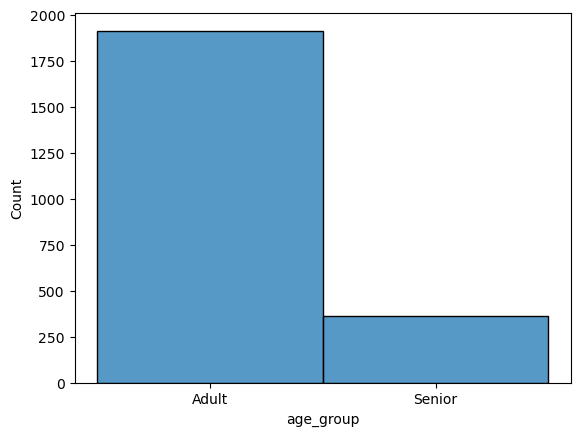

In [11]:
sns.histplot(data = age, x = "age_group")

# Same text as ca1

By plotting this graphic of the target variable "class" we can see that the amount of failures for components not related to the APS system is significantly superior to the ones related to the APS. The difference between the two classes are so strong that it may be necessary to balance the dataset so the accuracy can be more trustworthy. A higher accuracy in this case might be misleading given the bias. The imbalance of the dataset can cause an overfitting in the Machine Learning Model when the minority class tends to be ignored over the majority (Truong, 2022). 

The application of SMOTE (Synthetic Minority Oversampling Technique), where the dataset is balanced by the creation of synthetic samples of the minority class (SATPATHY) can be a solution for this problem or undersampling techniques such as Near-miss that eliminate the majority class observations by random in order to balance the dataset (Imarticus, 2021).


# SAME TEXT AS CA1

"Forcing an ordinal relationship via an ordinal encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories)." (Brownlee, 2020). That is the reason why the variable "class" will be transformed in a numerical data through the One-Hot Enconding where a binary value will be put in place and no ordinal relationship will be forced. This method create two new features where "class_neg" will be 1 when the "neg" value is true and 0 when is false and "class_pos" will be the oposite. The new variable "class_pos" will be dropped so we have just one target variable and the Machine Learning models can perform their mathematical procedures. 

In [12]:
age = pd.get_dummies(age, dtype = int)

In [13]:
age.tail(2)

,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group_Adult,age_group_Senior
2276,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,1,0
2277,26.0,1.0,2.0,24.5,108.0,2.0,108.0,3.76,1,0


In [14]:
age.drop(columns = "age_group_Senior", inplace = True)

### There are more 0 in the "age_group_Senior" column 
justigy why this is better

In [15]:
age.tail(2)

,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group_Adult
2276,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,1
2277,26.0,1.0,2.0,24.5,108.0,2.0,108.0,3.76,1


for column in age.columns:
    plt.figure(figsize = (4, 2))
    plt.hist(age[column])
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

for column in age.columns:
    plt.figure(figsize = (4, 2))
    plt.boxplot(age[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

The distribution of the columns are not normal as we can see in the graphics 

# Correlation

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = age.columns
vif_data["VIF"] = [variance_inflation_factor(age.values, i) for i in range(age.shape[1])]
print(vif_data)

          Variable        VIF
0         RIDAGEYR  11.209553
1         RIAGENDR  10.367954
2           PAQ605  20.416338
3           BMXBMI  24.915629
4           LBXGLU  54.956103
5           DIQ010  55.210887
6           LBXGLT  14.247082
7            LBXIN   3.951943
8  age_group_Adult  11.327506


corr_matrix = np.corrcoef(age, rowvar = False)

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', 
            xticklabels = range(age.shape[1]), yticklabels = range(age.shape[1]))
plt.title("Feature Correlation Matrix")
plt.show()

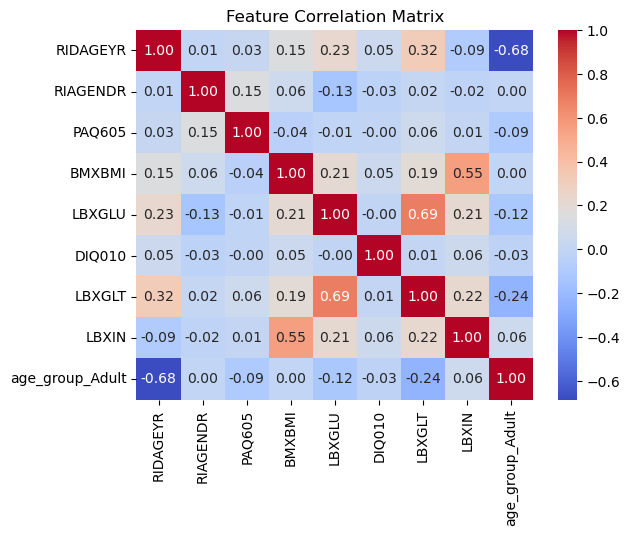

In [17]:
corr_matrix = age.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            xticklabels=age.columns, yticklabels=age.columns)

plt.title("Feature Correlation Matrix")
plt.show()

In [18]:
eigenvalues, _ = np.linalg.eig(corr_matrix)
print("Eigenvalues:", eigenvalues)

Eigenvalues: [2.28735158 1.6442327  0.25546501 0.28328876 0.46698967 1.18954507
 1.07942265 0.96177846 0.83192609]


In [19]:
condition_number = np.sqrt(np.max(eigenvalues) / np.min(eigenvalues))
print("Condition Number:", condition_number)

Condition Number: 2.992269808680624


In [20]:
def find_highly_correlated_vars(corr_matrix, threshold = 0.5):
    if isinstance(corr_matrix, pd.DataFrame):
        corr_matrix = corr_matrix.values
    rows, cols = np.where(np.abs(corr_matrix) > threshold)
    unique_pairs = set((min(r, c), max(r, c)) for r, c in zip(rows, cols) if r != c)
    return list(unique_pairs)

corr_matrix = age.corr()
highly_corr_vars = find_highly_correlated_vars(corr_matrix, threshold=0.5)

print("Pairs of highly correlated variables:", highly_corr_vars)

Pairs of highly correlated variables: [(3, 7), (0, 8), (4, 6)]


In [21]:
age.tail()

,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group_Adult
2273,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53,1
2274,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02,1
2275,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41,1
2276,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,1
2277,26.0,1.0,2.0,24.5,108.0,2.0,108.0,3.76,1


In [22]:
age_array = age.values

In [23]:
X = age_array[:, 0:8]

y = age_array[:, 8]

In [24]:
y

array([1., 1., 1., ..., 1., 1., 1.])

In [25]:
X.shape

(2278, 8)

In [26]:
X_with_constant = sm.add_constant(X)

model = sm.OLS(y, X_with_constant).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     278.5
Date:                Sat, 23 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:11:24   Log-Likelihood:                -166.09
No. Observations:                2278   AIC:                             350.2
Df Residuals:                    2269   BIC:                             401.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1410      0.078     14.679      0.0

## Normalisation

The MinMax method was chosen given the skeweness of the data. 

In [27]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

In [28]:
X_scaled

array([[0.72058824, 1.        , 0.16666667, ..., 0.5       , 0.19503546,
        0.14459129],
       [0.20588235, 1.        , 0.16666667, ..., 0.5       , 0.07092199,
        0.03631914],
       [0.05882353, 0.        , 0.16666667, ..., 0.5       , 0.04964539,
        0.05873715],
       ...,
       [0.32352941, 0.        , 0.16666667, ..., 0.5       , 0.14893617,
        0.2082232 ],
       [0.70588235, 1.        , 0.16666667, ..., 0.5       , 0.12056738,
        0.0474792 ],
       [0.20588235, 0.        , 0.16666667, ..., 0.5       , 0.12056738,
        0.03543808]])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 12)

In [30]:
X_scaled.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2278, 8), (2278,), (1822, 8), (456, 8), (1822,), (456,))

# LDA

In [31]:
num_components = len(np.unique(y)) - 1
print(f'Number of Components for LDA: {num_components}')

Number of Components for LDA: 1


In [32]:
lda = LinearDiscriminantAnalysis(n_components = 1)

X_train_lda = lda.fit_transform(X_train, y_train)

X_test_lda = lda.transform(X_test)

In [33]:
X_train_lda.shape, X_test_lda.shape

((1822, 1), (456, 1))

# Models

# Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
linear_reg = LinearRegression()

linear_reg.fit(X_train_lda, y_train)

yp_lr = linear_reg.predict(X_test_lda)

mse = mean_squared_error(y_test, yp_lr)
mse_r = mean_squared_error(y_test, yp_lr, squared = False)
r2 = r2_score(y_test, yp_lr)

n = len(y_test)
k = X_train_lda.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 0.061375360072060514
Root Mean Squared Error: 0.24774050954993315
R-squared: 0.5041900982150748
Adjusted R-squared: 0.5030980059203942


In [36]:
train_pred = linear_reg.predict(X_train_lda)
test_pred = linear_reg.predict(X_test_lda)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

Training MSE: 0.06936946782603787
Validation MSE: 0.061375360072060514


In [37]:
import tensorflow as tf
def huber_loss(y_test, yp_lr, delta=1.0):
    error = y_test - yp_lr
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_lr, delta=1.0)

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Mean Huber Loss: 0.030687680036030257


In [38]:
score_l = cross_val_score(LinearRegression(), X_test_lda, y_test, cv = 5, scoring = 'r2').mean()
score_l

0.4822401284497195

In [39]:
pred = pd.DataFrame({'Actual': y_test, 'Predicted': yp_lr})
pred.head()

,Actual,Predicted
0,1.0,0.887366
1,1.0,0.754785
2,1.0,0.797776
3,1.0,1.063739
4,1.0,1.049490


## Polynomial 2 and 3

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
poly_features = PolynomialFeatures(degree = 2)

X_train_poly = poly_features.fit_transform(X_train_lda)
X_test_poly = poly_features.transform(X_test_lda)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

yp_p2 = poly_reg.predict(X_test_poly)

mse = mean_squared_error(y_test, yp_p2)
mse_r = mean_squared_error(y_test, yp_p2, squared = False)
r2 = r2_score(y_test, yp_p2)

n = len(y_test)
k = X_train_lda.shape[1]  # Number of features
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 0.029548961922498677
Root Mean Squared Error: 0.17189811494748475
R-squared: 0.7612939803295771
Adjusted R-squared: 0.760768196145281


In [42]:
score_lp2 = cross_val_score(poly_reg, X_test_lda, y_test, cv = 5, scoring = 'r2').mean()
score_lp2

0.4822401284497195

In [43]:
pred_p2 = pd.DataFrame({'Actual': y_test, 'Predicted': yp_p2})
pred_p2.head()

,Actual,Predicted
0,1.0,1.053951
1,1.0,0.946342
2,1.0,0.991959
3,1.0,1.045392
4,1.0,1.052515


In [44]:
degree = 3
poly_features = PolynomialFeatures(degree=degree)

X_train_poly = poly_features.fit_transform(X_train_lda)
X_test_poly = poly_features.transform(X_test_lda)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

yp_p3 = poly_reg.predict(X_test_poly)

mse = mean_squared_error(y_test, yp_p3)
r2 = r2_score(y_test, yp_p3)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.02872866991275462
R-squared: 0.7679205630544466


## Ridge

In [45]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1.0)  # Adjust alpha based on the strength of regularization
ridge_reg.fit(X_train_lda, y_train)

yp_lnR = ridge_reg.predict(X_test_lda)

mse = mean_squared_error(y_test, yp_lnR)
r2 = r2_score(y_test, yp_lnR)

print(f'Mean Squared Error (Ridge): {mse}')
print(f'R-squared (Ridge): {r2}')

Mean Squared Error (Ridge): 0.06137327445830175
R-squared (Ridge): 0.5042069464739147


In [46]:
pred_lnR = pd.DataFrame({'Actual': y_test, 'Predicted': yp_lnR})
pred_lnR.head()

,Actual,Predicted
0,1.0,0.887352
1,1.0,0.754808
2,1.0,0.797786
3,1.0,1.063675
4,1.0,1.049430


In [47]:
degree = 2

poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_lda)
X_test_poly = poly.transform(X_test_lda)

ridge_reg2 = Ridge(alpha = 10.0) 
ridge_reg2.fit(X_train_poly, y_train)

yp_rp2 = ridge_reg2.predict(X_test_poly)

mse_ridge = mean_squared_error(y_test, yp_rp2)
mse_ridge_r = mean_squared_error(y_test, yp_rp2, squared = False)
r2_ridge = r2_score(y_test, yp_rp2)

n = len(y_test)
k = X_train_lda.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error (Ridge): {mse_ridge}')
print(f'Root Mean Squared Error: {mse_ridge_r}')
print(f'R-squared (Ridge): {r2_ridge}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error (Ridge): 0.02954540641833174
Root Mean Squared Error: 0.17188777274236738
R-squared (Ridge): 0.7613227028359663
Adjusted R-squared: 0.5031148912899366


In [48]:
score_rp2 = cross_val_score(ridge_reg2, X_test_lda, y_test, cv = 5, scoring = 'r2').mean()
score_rp2

0.4826095057925041

In [49]:
train_pred = ridge_reg2.predict(X_train_poly)
test_pred = ridge_reg2.predict(X_test_poly)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_rp2, delta = 1.0):
    error = y_test - yp_rp2
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)


mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 0.037090108919414715
Validation MSE: 0.02954540641833174
Mean Huber Loss: 0.030687680036030257


## Lasso

In [50]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 1.0) 
lasso_reg.fit(X_train_lda, y_train)

yp_lnL = lasso_reg.predict(X_test_lda)

mse = mean_squared_error(y_test, yp_lnL)
r2 = r2_score(y_test, yp_lnL)

print(f'Mean Squared Error (Lasso): {mse}')
print(f'R-squared (Lasso): {r2}')

Mean Squared Error (Lasso): 0.12414226934345494
R-squared (Lasso): -0.0028611856332807495


In [51]:
degree = 2

poly = PolynomialFeatures(degree = degree, include_bias = False)
X_train_poly = poly.fit_transform(X_train_lda)
X_test_poly = poly.transform(X_test_lda)
 
lasso_reg = Lasso(alpha = 1.0, max_iter = 1000)
lasso_reg.fit(X_train_poly, y_train)

yp_lp2 = lasso_reg.predict(X_test_poly)

mse_lasso = mean_squared_error(y_test, yp_lp2)
r2_lasso = r2_score(y_test, yp_lp2)

print(f'Mean Squared Error (Lasso): {mse_lasso}')
print(f'R-squared (Lasso): {r2_lasso}')

Mean Squared Error (Lasso): 0.12414226934345494
R-squared (Lasso): -0.0028611856332807495


# Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state = 12), param_grid, cv = 5, scoring = 'r2')
grid_search.fit(X_train_lda, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test_lda)
mse = mean_squared_error(y_test, y_pred_best)
mse_r = mean_squared_error(y_test, y_pred_best, squared = False)
r2_best = r2_score(y_test, y_pred_best)

n = len(y_test)
k = X_train_lda.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared (Best Model): {r2_best}')
print(f'Adjusted R-squared: {adj_r2}')

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 100}
Mean Squared Error: 0.017023379205360876
Root Mean Squared Error: 0.13047367246061894
R-squared (Best Model): 0.8624796667270428
Adjusted R-squared: -0.005070130976085441


In [54]:
score_rf = cross_val_score(RandomForestRegressor(max_depth = 10,
                                              min_samples_leaf = 4, 
                                              n_estimators = 50,
                                              random_state = 12), X_test_lda, y_test, 
                           cv = 10, scoring = 'r2').mean()
score_rf

0.8104943334194203

In [55]:
pred_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_best})
pred_rf.head(3)

,Actual,Predicted
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0


In [56]:
train_pred = best_model.predict(X_train_lda)
test_pred = best_model.predict(X_test_lda)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tfx
def huber_loss(y_test, y_pred_best, delta = 1.0):
    error = y_test - y_pred_best
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, y_pred_best, delta = 1.0)


mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 0.016707931331548447
Validation MSE: 0.017023379205360876
Mean Huber Loss: 0.008511689602680438


# ANN

In [57]:
# !pip install tensorflow
 #!pip install keras


In [58]:
#pip install --upgrade pip

In [59]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=X_train_lda.shape[1]))

model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=8, activation='relu'))

model.add(Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

#from keras.layers import Dropout
#model.add(Dropout(0.5)) 

#from keras.regularizers import l1, l2
#model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)
model.fit(X_train_lda, y_train, epochs = 300, batch_size = 64, validation_split = 0.2, callbacks=[early_stopping])

y_pred = model.predict(X_test_lda)

mse = mean_squared_error(y_test, y_pred)
mse_r = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)

n = len(y_test)
k = X_train_lda.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))



Epoch 1/300
23/23 [==============================] - 0s 3ms/step - loss: 0.6840 - val_loss: 0.5547
Epoch 2/300
23/23 [==============================] - 0s 938us/step - loss: 0.4222 - val_loss: 0.2727
Epoch 3/300
23/23 [==============================] - 0s 966us/step - loss: 0.2202 - val_loss: 0.1769
Epoch 4/300
23/23 [==============================] - 0s 953us/step - loss: 0.1509 - val_loss: 0.1172
Epoch 5/300
23/23 [==============================] - 0s 1ms/step - loss: 0.0938 - val_loss: 0.0680
Epoch 6/300
23/23 [==============================] - 0s 976us/step - loss: 0.0485 - val_loss: 0.0370
Epoch 7/300
23/23 [==============================] - 0s 926us/step - loss: 0.0324 - val_loss: 0.0324
Epoch 8/300
23/23 [==============================] - 0s 1ms/step - loss: 0.0307 - val_loss: 0.0312
Epoch 9/300
23/23 [==============================] - 0s 937us/step - loss: 0.0284 - val_loss: 0.0291
Epoch 10/300
23/23 [==============================] - 0s 911us/step - loss: 0.0264 - val_loss: 0.

In [60]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 0.0165665591710328
Root Mean Squared Error: 0.12871114625793992
R-squared: 0.866170005913447
Adjusted R-squared: 0.8658752261907894


In [61]:
train_pred = model.predict(X_train_lda)
test_pred = model.predict(X_test_lda)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, y_pred, delta = 1.0):
    error = y_test - y_pred
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, y_pred, delta = 1.0)


mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

15/15 [==============================] - 0s 380us/step
Training MSE: 0.023457732334083842
Validation MSE: 0.0165665591710328
Mean Huber Loss: 0.11511668513229968


# SVM

In [62]:
from sklearn import svm

In [63]:
regressor = svm.SVR(kernel = 'linear', C = 5.0, epsilon = 2.5)

regressor.fit(X_train_lda, y_train)

yp_svm = regressor.predict(X_test_lda)

mse = mean_squared_error(y_test, yp_svm)
mse_r = mean_squared_error(y_test, yp_svm, squared = False)
r2 = r2_score(y_test, yp_svm)

n = len(y_test)
k = X_train_lda.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 0.25
Root Mean Squared Error: 0.5
R-squared: -1.0195804195804197
Adjusted R-squared: -1.024028834601522


In [64]:
score_svm = cross_val_score(svm.SVR(kernel = 'linear', C = 5.0, epsilon = 2.5), 
                            X_test_lda, y_test, cv = 10, scoring = 'r2').mean()
score_svm

-1.45054425979604

In [65]:
pred_svm = pd.DataFrame({'Actual': y_test, 'Predicted': yp_svm})
pred_svm.head()

,Actual,Predicted
0,1.0,0.5
1,1.0,0.5
2,1.0,0.5
3,1.0,0.5
4,1.0,0.5


In [66]:
regressor = svm.SVR(kernel = 'poly', C = 50.0, epsilon = 3.5, degree = 2)

regressor.fit(X_train_lda, y_train)

yp_svm_p2 = regressor.predict(X_test_lda)

mse = mean_squared_error(y_test, yp_svm_p2)
mse_r = mean_squared_error(y_test, yp_svm_p2, squared = False)
r2 = r2_score(y_test, yp_svm_p2)

n = len(y_test)
k = X_train_lda.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 0.25
Root Mean Squared Error: 0.5
R-squared: -1.0195804195804197
Adjusted R-squared: -1.024028834601522


In [67]:
score_svr = cross_val_score(svm.SVR(kernel = 'poly', C = 50.0, epsilon = 3.5, degree = 2), 
                            X_test_lda, y_test, cv = 10, scoring = 'r2').mean()
score_svr

-1.45054425979604

In [68]:
train_pred = regressor.predict(X_train_lda)
test_pred = regressor.predict(X_test_lda)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_svm_p2, delta = 1.0):
    error = y_test - yp_svm_p2
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_svm_p2, delta = 1.0)


mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 0.25
Validation MSE: 0.25
Mean Huber Loss: 0.125


In [69]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.1, 1, 10, 100],
              'epsilon': [0.1, 0.5, 1, 2],
              'degree': [2, 3, 4]}

random_search = RandomizedSearchCV(svm.SVR(), param_dist, cv=5)
random_search.fit(X_train_lda, y_train)

best_params = random_search.best_params_
best_regressor = random_search.best_estimator_

yp_best = best_regressor.predict(X_test_lda)


In [70]:
best_params

{'kernel': 'rbf', 'epsilon': 0.1, 'degree': 4, 'C': 100}

In [71]:
regressor = svm.SVR(kernel = 'rbf', C = 1, epsilon = 0.1, degree = 3)

regressor.fit(X_train_lda, y_train)

yp_svm_p2 = regressor.predict(X_test_lda)

mse = mean_squared_error(y_test, yp_svm_p2)
mse_r = mean_squared_error(y_test, yp_svm_p2, squared = False)
r2 = r2_score(y_test, yp_svm_p2)

n = len(y_test)
k = X_train_lda.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 0.020390112505529027
Root Mean Squared Error: 0.1427939512217833
R-squared: 0.8352821121231669
Adjusted R-squared: 0.8349192973921606


In [72]:
score_svr = cross_val_score(svm.SVR(kernel = 'rbf', C = 1, epsilon = 0.1, degree = 3), 
                            X_test_lda, y_test, cv = 10, scoring = 'r2').mean()
score_svr

0.7969298296530405

In [73]:
train_pred = regressor.predict(X_train_lda)
test_pred = regressor.predict(X_test_lda)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_svm_p2, delta = 1.0):
    error = y_test - yp_svm_p2
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_svm_p2, delta = 1.0)


mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 0.02793909257265239
Validation MSE: 0.020390112505529027
Mean Huber Loss: 0.010195056252764513


# KNN

In [74]:
from sklearn.neighbors import KNeighborsRegressor

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train_lda, y_train)

best_k = grid_search.best_params_['n_neighbors']
#knn_regressor = KNeighborsRegressor(n_neighbors=best_k)
#knn_regressor.fit(X_train, y_train)

best_k

11

In [76]:
knn_regressor = KNeighborsRegressor(n_neighbors = 15, metric = 'manhattan') 

knn_regressor.fit(X_train_lda, y_train)

yp_knn = knn_regressor.predict(X_test_lda)

mse = mean_squared_error(y_test, yp_knn)
mse_r = mean_squared_error(y_test, yp_knn, squared = False)
r2 = r2_score(y_test, yp_knn)

n = len(y_test)
k = X_train_lda.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 0.016842105263157894
Root Mean Squared Error: 0.12977713690461004
R-squared: 0.8639440559440559
Adjusted R-squared: 0.8636443732478974


In [77]:
score_knn = cross_val_score(KNeighborsRegressor(n_neighbors = 7, metric='manhattan'), 
                            X_test_lda, y_test, cv = 5, scoring = 'r2').mean()
score_knn

0.8460021491980048

In [78]:
pred_knn = pd.DataFrame({'Actual': y_test, 'Predicted': yp_knn})
pred_knn.head()

,Actual,Predicted
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


In [79]:
train_pred = knn_regressor.predict(X_train_lda)
test_pred = knn_regressor.predict(X_test_lda)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_knn, delta = 1.0):
    error = y_test - yp_knn
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_knn, delta = 1.0)


mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 0.021575801927064275
Validation MSE: 0.016842105263157894
Mean Huber Loss: 0.008421052631578947


## Bagging Regressor KNN

In [80]:
from sklearn.ensemble import BaggingRegressor

bagging_regressor = BaggingRegressor(KNeighborsRegressor(n_neighbors = 7), n_estimators = 10, random_state = 12)
bagging_regressor.fit(X_train_lda, y_train)


yp_knn_bgg = bagging_regressor.predict(X_test_lda)

mse = mean_squared_error(y_test, yp_knn_bgg)
mse_r = mean_squared_error(y_test, yp_knn_bgg, squared = False)
r2 = r2_score(y_test, yp_knn_bgg)

n = len(y_test)
k = X_train_lda.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 0.01773809523809524
Root Mean Squared Error: 0.1331844406756857
R-squared: 0.8567059607059607
Adjusted R-squared: 0.8563903350687492


In [81]:
score_knn_bgg = cross_val_score(BaggingRegressor(KNeighborsRegressor(n_neighbors = 7), n_estimators = 10, random_state=12), 
                            X_test_lda, y_test, cv = 5, scoring = 'r2').mean()
score_knn_bgg

0.8637240729453005

In [82]:
train_pred = bagging_regressor.predict(X_train_lda)
test_pred = bagging_regressor.predict(X_test_lda)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_knn_bgg, delta = 1.0):
    error = y_test - yp_knn_bgg
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_knn_bgg, delta = 1.0)


mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 0.0194481283182867
Validation MSE: 0.01773809523809524
Mean Huber Loss: 0.00886904761904762


# Decision Tree

In [83]:
from sklearn.tree import DecisionTreeRegressor

In [84]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train_lda, y_train)

best_params = grid_search.best_params_
best_params

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

In [85]:
tree_regressor = DecisionTreeRegressor(
    max_depth = None,
    min_samples_split = 10,
    min_samples_leaf = 4,
    random_state = 12
)

tree_regressor.fit(X_train_lda, y_train)

yp_dt = tree_regressor.predict(X_test_lda)

mse = mean_squared_error(y_test, yp_dt)
mse_r = mean_squared_error(y_test, yp_dt, squared = False)
r2 = r2_score(y_test, yp_dt)

n = len(y_test)
k = X_train_lda.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 0.02142819467374344
Root Mean Squared Error: 0.14638372407389916
R-squared: 0.8268961504398012
Adjusted R-squared: 0.8265148644275541


In [86]:
score_dt = cross_val_score(DecisionTreeRegressor(max_depth = 30, min_samples_split = 5, 
                                                 min_samples_leaf = 4, random_state = 12), 
X_test_lda, y_test, cv = 5, scoring = 'r2').mean()

score_dt

0.7769076916992622

In [87]:
pred_dt = pd.DataFrame({'Actual': y_test, 'Predicted': yp_dt})
pred_dt.head()

,Actual,Predicted
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


In [88]:
train_pred = tree_regressor.predict(X_train_lda)
test_pred = tree_regressor.predict(X_test_lda)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_dt, delta = 1.0):
    error = y_test - yp_dt
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_dt, delta = 1.0)


mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 0.015369687941038107
Validation MSE: 0.02142819467374344
Mean Huber Loss: 0.01071409733687172


# Summary

In [89]:
print("R2 LN:", r2_score(y_test, yp_lr))

print("R2 LNP2:", r2_score(y_test, yp_p2))

print("R2 RP2:", r2_score(y_test, yp_rp2))

print("R2 RF:", r2_score(y_test, y_pred_best))

print("R2 Report SVM:", r2_score(y_test, yp_svm))

print("R2 SVR:", r2_score(y_test, yp_svm_p2))

print("R2 KNN:", r2_score(y_test, yp_knn))

print("R2 KNN BGG:", r2_score(y_test, yp_knn_bgg))

print("R2 DT:", r2_score(y_test, yp_dt))

R2 LN: 0.5041900982150748
R2 LNP2: 0.7612939803295771
R2 RP2: 0.7613227028359663
R2 RF: 0.8624796667270428
R2 Report SVM: -1.0195804195804197
R2 SVR: 0.8352821121231669
R2 KNN: 0.8639440559440559
R2 KNN BGG: 0.8567059607059607
R2 DT: 0.8268961504398012
